# Data Preprocessing


#    Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [2]:
data = pd.read_csv('events.csv')

In [3]:
data.head()

,date,latitude,longitude,event-type,city,county,state
0,01-01-2003 05:00,26.33,-81.14,FLOOD,UNKNOWN,HILLSBOROUGH,FL
1,01-01-2003 05:00,27.22,-81.13,FLOOD,UNKNOWN,MANATEE,FL
2,01-01-2003 08:00,45.28,-120.12,FLOOD,UNKNOWN,SOUTH CENTRAL OREGON COAST,OR
3,01-01-2003 14:15,38.54,-86.03,FLOOD,UNKNOWN,JACKSON,IN
4,01-01-2003 18:00,38.59,-85.38,FLOOD,UNKNOWN,JEFFERSON,IN


In [4]:
data.tail()

,date,latitude,longitude,event-type,city,county,state
370246,10-10-2022 19:10,18.38,-66.12,FLASH FLOOD,GUAYNABO,GUAYNABO,PR
370247,10-10-2022 19:43,18.39,-66.14,FLASH FLOOD,1 ENE BAYAMON,BAYAMON,PR
370248,10-10-2022 20:36,18.44,-66.18,FLOOD,LEVITTOWN,TOA BAJA,PR
370249,10-10-2022 21:16,37.25,-112.95,FLASH FLOOD,ZION NP,WASHINGTON,UT
370250,10-10-2022 23:30,30.89,-102.89,FLASH FLOOD,FORT STOCKTON,PECOS,TX


# Display basic information about the dataset

In [5]:
 print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370251 entries, 0 to 370250
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        370251 non-null  object 
 1   latitude    370251 non-null  float64
 2   longitude   370251 non-null  float64
 3   event-type  370251 non-null  object 
 4   city        370247 non-null  object 
 5   county      369713 non-null  object 
 6   state       370251 non-null  object 
dtypes: float64(2), object(5)
memory usage: 19.8+ MB
None


# Summary statistics

In [6]:
print(data.describe())

            latitude      longitude
count  370251.000000  370251.000000
mean       39.557714     -91.896276
std         4.956872      13.171591
min         1.980000    -171.720000
25%        37.300000     -97.310000
50%        40.100000     -89.780000
75%        42.640000     -84.020000
max        75.000000      73.410000


# Check for missing values

In [7]:
print(data.isnull().sum())

date            0
latitude        0
longitude       0
event-type      0
city            4
county        538
state           0
dtype: int64


# Understanding the correaltion of Dataset

In [8]:
data.corr()

,latitude,longitude
latitude,1.000000,-0.081209
longitude,-0.081209,1.000000


<AxesSubplot:>

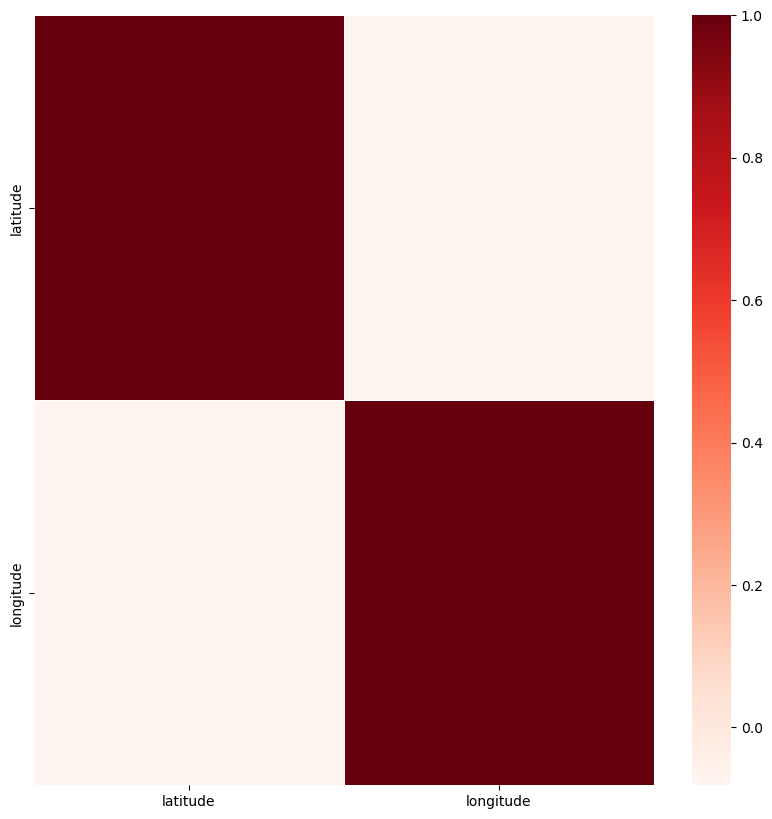

In [9]:
plt.figure(figsize=(10,10))
corr = data.corr()
sns.heatmap(corr, cmap="Reds",linewidths=.5)

# Perform EDA (Exploratory Data Analytics)

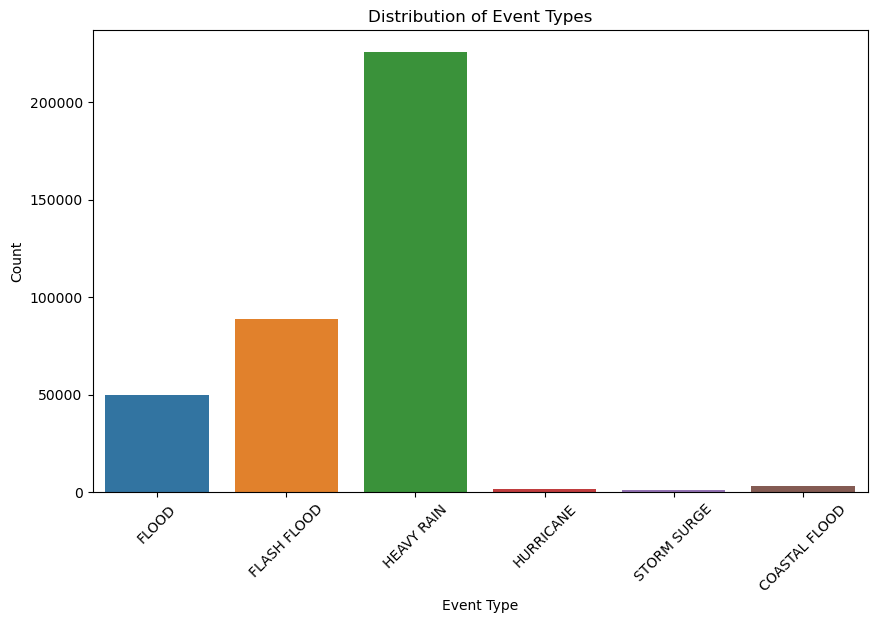

In [10]:
# Plot distribution of event types
plt.figure(figsize=(10,6))
sns.countplot(x='event-type', data=data)
plt.title('Distribution of Event Types')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plot events over time

In [11]:
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year

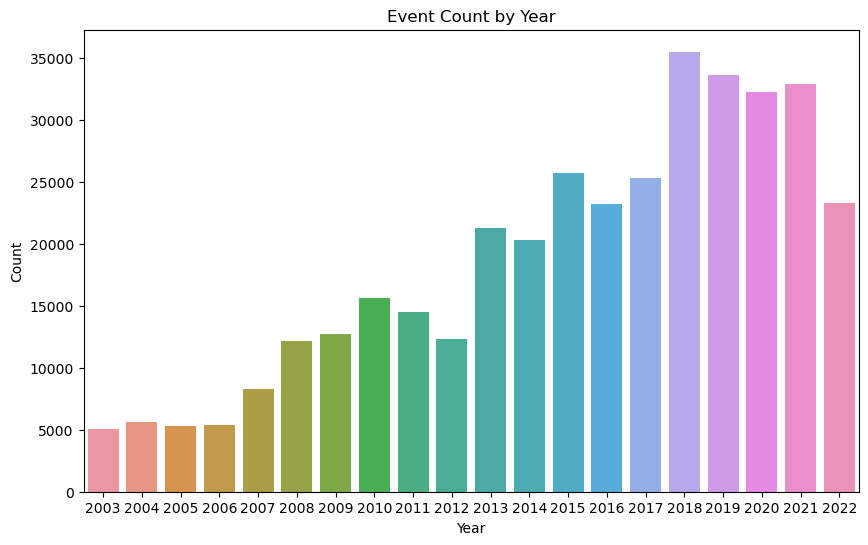

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(x='year', data=data)
plt.title('Event Count by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

# Check geographical distribution of events

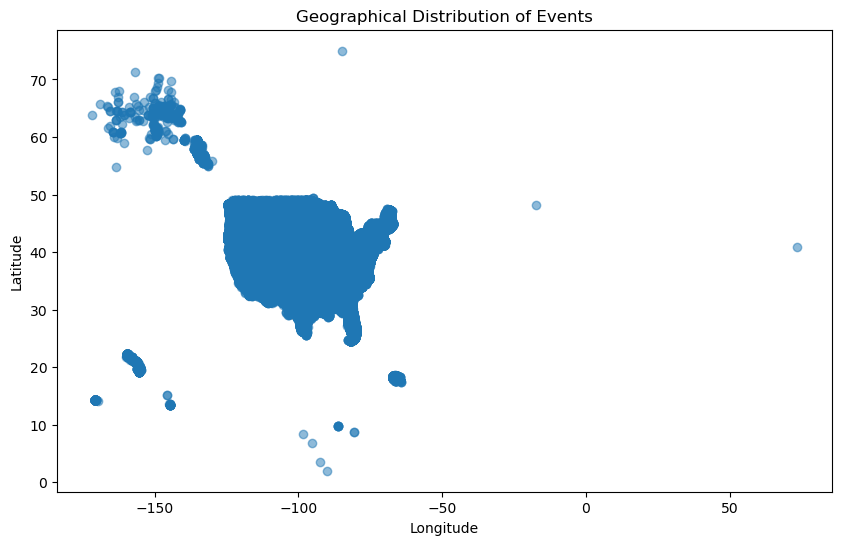

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(data['longitude'], data['latitude'], alpha=0.5)
plt.title('Geographical Distribution of Events')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Spatial Clustering to Identify High Risk Zones:

In [14]:
from sklearn.cluster import KMeans

# Perform KMeans clustering

In [15]:
X = data[['latitude', 'longitude']]
kmeans = KMeans(n_clusters=3) # You can adjust the number of clusters as needed
data['cluster'] = kmeans.fit_predict(X)

# Visualize clusters

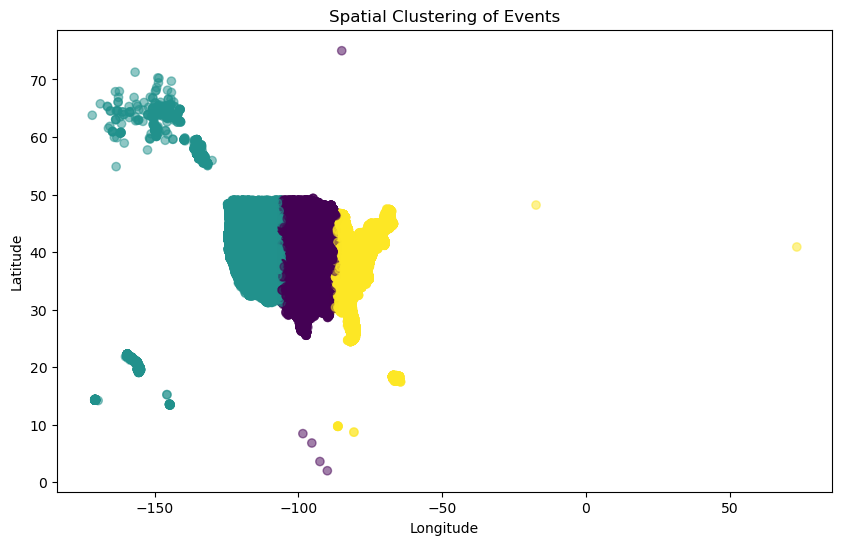

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(data['longitude'], data['latitude'], c=data['cluster'], cmap='viridis', alpha=0.5)
plt.title('Spatial Clustering of Events')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Script to Calculate Total Events Within 50 KM of a Point:

In [17]:
pip install geopy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [18]:
from geopy.distance import geodesic

def count_events_within_radius(data, latitude, longitude, radius_km):
    center_point = (latitude, longitude)
    total_events = 0
    for _, event in data.iterrows():
        event_point = (event['latitude'], event['longitude'])
        distance = geodesic(center_point, event_point).kilometers
        if distance <= radius_km:
            total_events += 1
    return total_events

# Example usage
latitude = 40.7128
longitude = -74.0060
radius_km = 50
total_events_within_radius = count_events_within_radius(data, latitude, longitude, radius_km)
print("Total events within 50 KM:", total_events_within_radius)

Total events within 50 KM: 2360


# Horizontal bar plot for distribution of event types


plt.figure(figsize=(10, 6))
sns.countplot(y='event-type', data=data, order=data['event-type'].value_counts().index)
plt.title('Distribution of Event Types')
plt.xlabel('Count')
plt.ylabel('Event Type')
plt.show()

# Bar plot for Total events within 50 KM

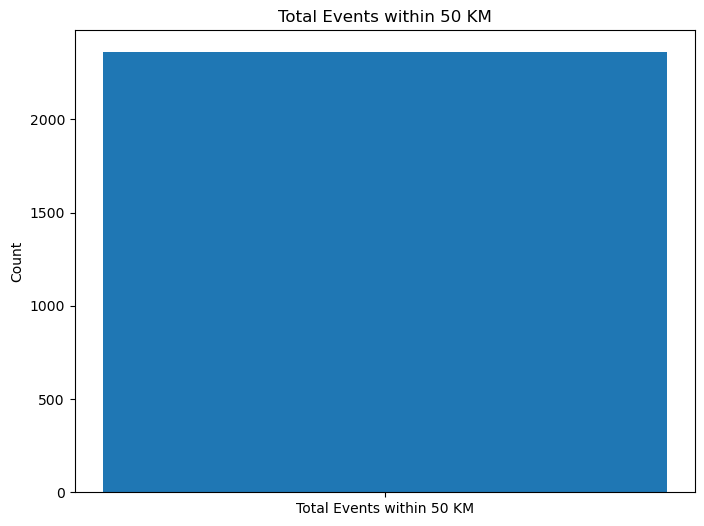

In [20]:
plt.figure(figsize=(8, 6))
plt.bar(['Total Events within 50 KM'], [total_events_within_radius])
plt.title('Total Events within 50 KM')
plt.ylabel('Count')
plt.show()

# Pie chart for Total events within 50 KM

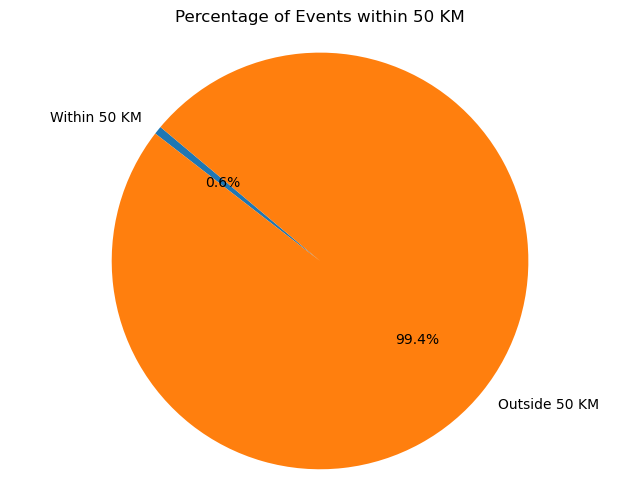

In [21]:
labels = ['Within 50 KM', 'Outside 50 KM']
sizes = [total_events_within_radius, len(data) - total_events_within_radius]

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Events within 50 KM')
plt.axis('equal')
plt.show()

# Conclusion

Based on analysis, we have determined that only a mere 0.6 percent of events occur within a 50 km radius, while a staggering 99.4 percent are situated outside this range. In concrete terms, this translates to a total of 2360 events occurring within this 50 km radius.